1.LOAD DRIVE


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TRANING USING CNN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 256)       7168      
                                                                 
 activation_3 (Activation)   (None, 98, 98, 256)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 128)       295040    
                                                                 
 activation_4 (Activation)   (None, 47, 47, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                 

<ipython-input-3-553502eedf70>:57: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
150/150 [==============================] - 603s 4s/step - loss: 0.5860 - accuracy: 0.7163 - val_loss: 0.6278 - val_accuracy: 0.7044
Epoch 2/25
150/150 [==============================] - 17s 112ms/step - loss: 0.4812 - accuracy: 0.7788 - val_loss: 0.3840 - val_accuracy: 0.8429
Epoch 3/25
150/150 [==============================] - 17s 111ms/step - loss: 0.4503 - accuracy: 0.7975 - val_loss: 0.3669 - val_accuracy: 0.8361
Epoch 4/25
150/150 [==============================] - 16s 109ms/step - loss: 0.4111 - accuracy: 0.8196 - val_loss: 0.3382 - val_accuracy: 0.8480
Epoch 5/25
150/150 [==============================] - 15s 102ms/step - loss: 0.3735 - accuracy: 0.8383 - val_loss: 0.3124 - val_accuracy: 0.8581
Epoch 6/25
150/150 [==============================] - 15s 102ms/step - loss: 0.3475 - accuracy: 0.8537 - val_loss: 0.4279 - val_accuracy: 0.8108
Epoch 7/25
150/150 [==============================] - 16s 104ms/step - loss: 0.3007 - accuracy: 0.8725 - val_loss: 0.2614 - val_accu

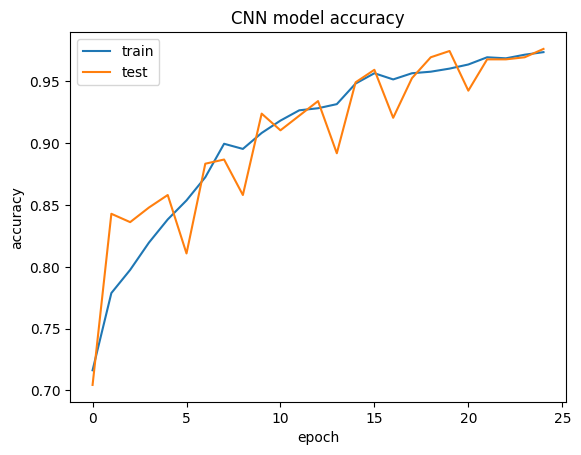

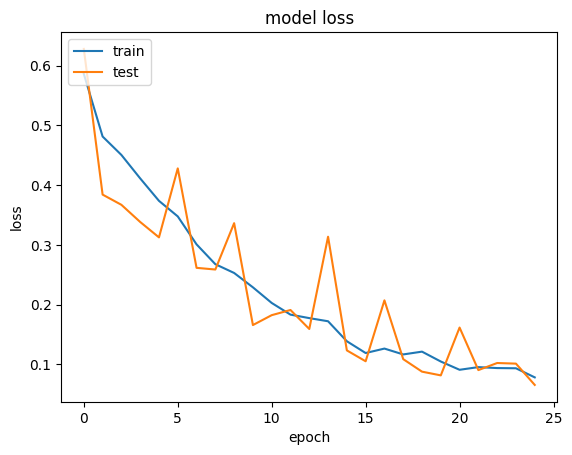

1051.257392168045


In [3]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras
start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_1/Train'
validation_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_1/Test'
nb_train_samples = 2400
nb_validation_samples = 600
epochs =25
batch_size = 16

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical', shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_cnn.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_CNN')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


CLASSIFICATION REPORT


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Benign','malignant']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-4-35bbb264a5d9>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[293   7]
 [  7 293]]
Classification Report
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98       300
   malignant       0.98      0.98      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



CONFUSION MATRIX

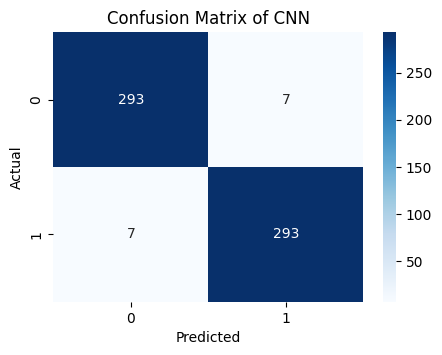

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_CNN.png')

# Show the plot
plt.show()


XCEPTION

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 22041322 (84.08 MB)
Trainable params: 21986794 (83.87 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________
Found 24

<ipython-input-7-479a27aa28a8>:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
150/150 [==============================] - 47s 135ms/step - loss: 0.5464 - accuracy: 0.7633 - val_loss: 4.6348 - val_accuracy: 0.5220
Epoch 2/25
150/150 [==============================] - 18s 119ms/step - loss: 0.1944 - accuracy: 0.9267 - val_loss: 0.2967 - val_accuracy: 0.8716
Epoch 3/25
150/150 [==============================] - 18s 122ms/step - loss: 0.1296 - accuracy: 0.9583 - val_loss: 0.2834 - val_accuracy: 0.8868
Epoch 4/25
150/150 [==============================] - 18s 117ms/step - loss: 0.1021 - accuracy: 0.9688 - val_loss: 0.2126 - val_accuracy: 0.9611
Epoch 5/25
150/150 [==============================] - 19s 124ms/step - loss: 0.1235 - accuracy: 0.9663 - val_loss: 3.9897 - val_accuracy: 0.6723
Epoch 6/25
150/150 [==============================] - 19s 126ms/step - loss: 0.0983 - accuracy: 0.9704 - val_loss: 0.0897 - val_accuracy: 0.9595
Epoch 7/25
150/150 [==============================] - 19s 125ms/step - loss: 0.0622 - accuracy: 0.9862 - val_loss: 0.0639 - val_ac

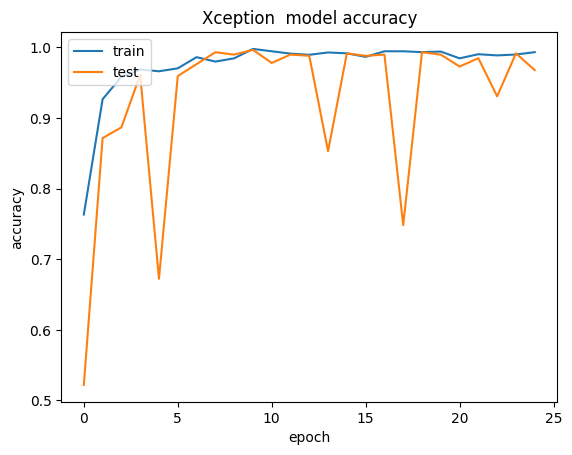

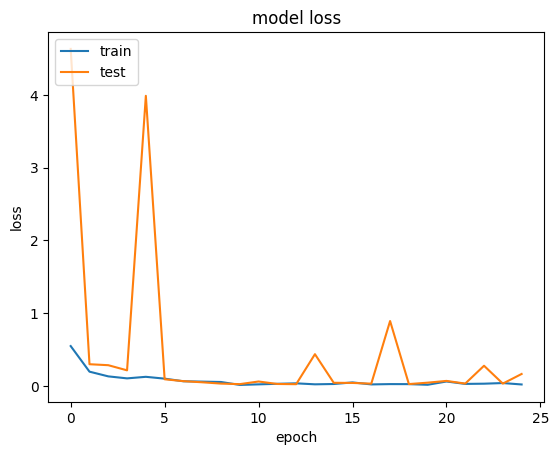

528.4438359737396


In [7]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import Xception
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf

start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_1/Train'
validation_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_1/Test'
nb_train_samples = 2400
nb_validation_samples = 600
epochs =25
batch_size = 16


input_shape = (img_width, img_height, 3)

# Use Xception as the base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_xcpetion.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception  model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


CLASSIFICATION REPORT


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Benign','malignant']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-8-35bbb264a5d9>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[300   0]
 [ 20 280]]
Classification Report
              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97       300
   malignant       1.00      0.93      0.97       300

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



CONFUSION MATRIX


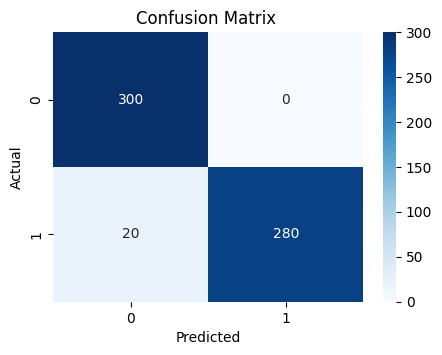

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_XCEPTION.png')

# Show the plot
plt.show()




INCEPTION

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                131136    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21934050 (83.67 MB)
Trainable params: 21899618 (83.54 MB)
Non-trainable params: 34432 (134.50 KB)
_________

<ipython-input-11-872d155f8792>:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


150/150 [==============================] - 59s 141ms/step - loss: 0.5476 - accuracy: 0.7246 - val_loss: 0.3970 - val_accuracy: 0.8311
Epoch 2/25
150/150 [==============================] - 21s 137ms/step - loss: 0.2589 - accuracy: 0.9004 - val_loss: 0.1869 - val_accuracy: 0.9527
Epoch 3/25
150/150 [==============================] - 24s 156ms/step - loss: 0.1576 - accuracy: 0.9492 - val_loss: 0.1916 - val_accuracy: 0.9426
Epoch 4/25
150/150 [==============================] - 20s 132ms/step - loss: 0.1263 - accuracy: 0.9567 - val_loss: 0.0870 - val_accuracy: 0.9730
Epoch 5/25
150/150 [==============================] - 21s 137ms/step - loss: 0.0780 - accuracy: 0.9754 - val_loss: 0.0846 - val_accuracy: 0.9713
Epoch 6/25
150/150 [==============================] - 20s 131ms/step - loss: 0.0564 - accuracy: 0.9812 - val_loss: 0.0583 - val_accuracy: 0.9814
Epoch 7/25
150/150 [==============================] - 20s 133ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.2627 - val_accuracy: 0.9

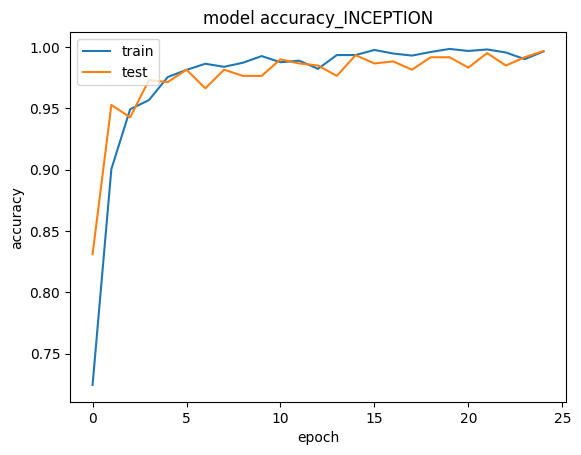

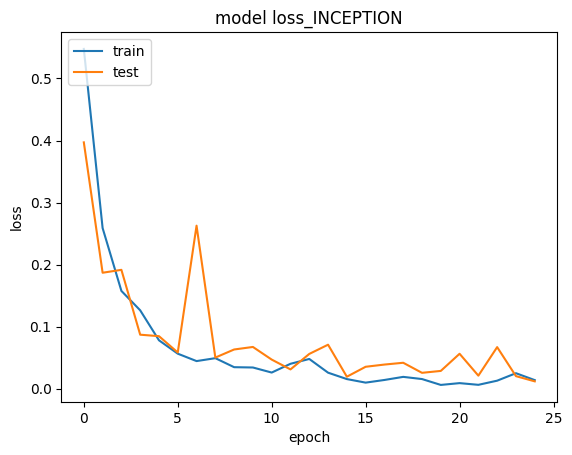

613.3583817481995


In [11]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import InceptionV3
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras

start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_1/Train'
validation_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_1/Test'
nb_train_samples = 2400
nb_validation_samples = 600
epochs =25
batch_size = 16


input_shape = (img_width, img_height, 3)

# Using InceptionV3 as base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_INCEPTION.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy_INCEPTION')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_INCEPTION')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


CLASSIFICATION REPORT

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Benign','malignant']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


<ipython-input-12-35bbb264a5d9>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[299   1]
 [  1 299]]
Classification Report
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       300
   malignant       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



CONFUSION MATRIX

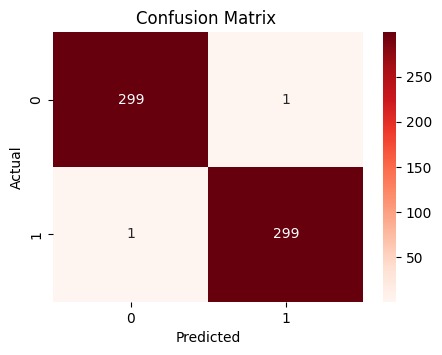

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Reds', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_INCEPTION.png')

# Show the plot
plt.show()



